# Statistics for Data Science
Summer 2025
Group 4

## Team members
- Jack (Xianguo) Hao
- Duc Vu Hoang
- Krishna Shah
- Joginder Singh

---

## **1. Problem Definition**

### **1.1 Hypothesis and Objectives of our Analysis**

**Objective:**  
The purpose of this project is to analyze how different living cost components vary across metro and non-metro areas in the U.S., and to build a predictive model estimating total living cost based on its components.

#### Part 1: Hypothesis and Statistical Inference

**Hypothesis Statement:**  
**H₀ (Null Hypothesis):** There is no significant difference in total cost of living between metro and non-metro counties.  
**H₁ (Alternative Hypothesis):** There is a significant difference in total cost of living between metro and non-metro counties.

**Method:**  
We will use an independent samples t-test to determine if the mean total cost differs significantly between the two groups (`isMetro = True` vs. `False`). The dataset provides sufficient sample sizes for both groups.

#### Part 2: Predictive Modeling

**Goal:**  
Build a model to predict `total_cost` of living using component costs such as:

- `housing_cost`
- `food_cost`
- `transportation_cost`
- `healthcare_cost`
- `childcare_cost`
- `taxes`

**Proposed Method:**  
**Technique:** Ordinary Least Squares (OLS) Linear Regression  
**Target Variable:** `total_cost`  
**Independent Variables:** Multiple cost categories listed above

**Alternative Option (if required for classification):**

We can categorize total_cost into cost tiers (e.g., Low, Medium, High) and use Naïve Bayes for classification based on the same predictors.

---

## **2. Data Preparation**

### **2.1 Package requirements**

Besides the default Python Anaconda installation (Python version 3.12.7), please install the following additional packages:
- Geopandas

### **2.2 Importing Modules**

In [12]:
# Importing libraries for data manipulation
import pandas as pd
import numpy as np

# Importing libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Patch
import matplotlib.colors as mcolors
import scipy.stats as stats

# Importing libraries for statistical analysis
import statsmodels.api as sm
import matplotlib.ticker as ticker
# Importing libraries for machine learning
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Importing libraries for geospatial analysis
#import geopandas as gpd

#Importing libraries for an interactive charts
import plotly.express as px

# Importing libraries for Box-Cox transformation
from scipy.stats import boxcox, shapiro

from scipy.stats import levene, ttest_ind
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### **2.3 Reading the data**

In [14]:
# Load the dataset
# The dataset contains the cost of living in various US cities
df = pd.read_csv('../data/cost_of_living_us.csv', na_values = '\xa0')
df.head()

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062


### **2.4 Inspecting the Data**

Checking for missing values and Garbage values

In [17]:
# Using the info() method to get a summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31430 entries, 0 to 31429
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31430 non-null  int64  
 1   state                   31430 non-null  object 
 2   isMetro                 31430 non-null  bool   
 3   areaname                31430 non-null  object 
 4   county                  31430 non-null  object 
 5   family_member_count     31430 non-null  object 
 6   housing_cost            31430 non-null  float64
 7   food_cost               31430 non-null  float64
 8   transportation_cost     31430 non-null  float64
 9   healthcare_cost         31430 non-null  float64
 10  other_necessities_cost  31430 non-null  float64
 11  childcare_cost          31430 non-null  float64
 12  taxes                   31430 non-null  float64
 13  total_cost              31430 non-null  float64
 14  median_family_income    31420 non-null

In [18]:
# Using the describe() method to get a summary of the DataFrame
# Note - Describe for int / float values
df.describe()

,case_id,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
count,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31420.000000
mean,1589.311804,11073.673539,8287.504557,13593.856381,13394.031748,7015.318377,9879.584233,7657.714782,70901.683601,68315.997017
std,917.218414,4165.606147,3271.140249,1640.456562,5204.545710,2397.415490,6778.223399,3339.795571,21846.545235,16886.970245
min,1.000000,4209.311280,2220.276840,2216.461440,3476.379960,2611.642080,0.000000,1027.800756,30087.662400,25529.976562
25%,792.000000,8580.000000,5801.424360,12535.159800,9667.440000,5286.354120,5341.621590,5597.970360,53776.019400,57223.988281
50%,1593.000000,10416.000000,8129.156280,13698.164400,13082.700000,6733.056120,10166.340120,6898.468860,70977.682800,65955.605469
75%,2386.000000,12444.000000,10703.624280,14765.758500,16657.816800,8413.090230,14276.377800,8790.207270,85371.341100,76136.070312
max,3171.000000,61735.587600,31178.619600,19816.482000,37252.274400,28829.443200,48831.085200,47753.390400,223717.548000,177662.468750


In [19]:
#Note - Data describe for Object values
df.describe(include=['O'])

,state,areaname,county,family_member_count
count,31430,31430,31430,31430
unique,51,2561,1877,10
top,TX,"Atlanta-Sandy Springs-Roswell, GA HUD Metro FM...",Washington County,1p0c
freq,2540,240,300,3143


In [20]:
# Duplicate Data 
# Check for duplicate rows in the DataFrame
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.count()

case_id                   0
state                     0
isMetro                   0
areaname                  0
county                    0
family_member_count       0
housing_cost              0
food_cost                 0
transportation_cost       0
healthcare_cost           0
other_necessities_cost    0
childcare_cost            0
taxes                     0
total_cost                0
median_family_income      0
dtype: int64

In [21]:
# Null Data
# Checking for null values in the DataFrame
df.isnull().sum()

case_id                    0
state                      0
isMetro                    0
areaname                   0
county                     0
family_member_count        0
housing_cost               0
food_cost                  0
transportation_cost        0
healthcare_cost            0
other_necessities_cost     0
childcare_cost             0
taxes                      0
total_cost                 0
median_family_income      10
dtype: int64

### **2.5 Initial Observations**

1. The data set contains 31430 rows and 15 columns 
2. Max case_id value is 3171, however each row should have unique value and max value should be 31430 does this mean there are duplicate case_id values, and if yes what does that mean ? Additionally, as per duplicate check there are no duplicate rows. Further analysis is required and also if it would make sense to type cast this column to string / object.
3. Childcare_cost has $0 values - does that mean there is missing values?
4. There are 51 unique state values - further investigation is required, considering there are 50 States in United States
5. Does values in 'areaname' columns are concatenated ? for instance 'Atlanta-Sandy.. ' and 'GA HUD Metro ..' is same area name or separate areanames
6. values in family_member_count also requires further investigation as it seems values in this field are coded. For instance does 1p0c means 1 person and no child ? if yes, this column is good candidate for Feature Engineer i.e. split parent and childrens information. 
7. there are 10 ( 0.03% ) rows where median_family_income is Null. Potentially can drop these rows 10 rows without as the count is not significant (however will inspect for any pattern of Null rows i.e. all from same state/county etc.)
8. As per wikipedia, in US there are 3,244 counties, however the dataset used for analysis only has data for 1877 counties. This indicates the data set is subset of US counties and is not representing the full population ( Wiki Link https://en.wikipedia.org/wiki/List_of_United_States_counties_and_county_equivalents#:~:text=In%20total%2C%20the%2050%20states,United%20States%20as%20county%20equivalents.) Note: After further analysis, the data set has data for 3133 counties and for 89 counties data is not available. The unique county count fo 1877 is misleading since, same county name is reused in multiple states for example 'Washington Conunty' is common against 30 states. Additionally, Puerto Rico state has the majority of data missing (78 counties) followed by Connecticut and Alaska, for which we don't have county data for 9 and 2 counties respectively.

### **2.6 Rough work**

In [25]:
# Now checking childcare_cost
# Childcare cost is sometimes 0 - is this a problem? are there missing values?
# if there aren't any children in the household, then it would make sense that the childcare costs are also 0.
# if these are the only instances of 0 childcare costs, then there is no problem.

df[df['childcare_cost'] == 0]['family_member_count'].value_counts()

family_member_count
1p0c    3143
2p0c    3143
Name: count, dtype: int64

In [26]:
# That is exactly the case.
# Another question: are those numbers exactly 10% of our dataset?
df['family_member_count'].value_counts()

family_member_count
1p0c    3143
1p1c    3143
1p2c    3143
1p3c    3143
1p4c    3143
2p0c    3143
2p1c    3143
2p2c    3143
2p3c    3143
2p4c    3143
Name: count, dtype: int64

In [27]:
# There are exactly 10 rows per case_id and each family_member_count is represented exactly 1/10th of the time - is this related?
df.groupby(['family_member_count', 'case_id']).count().shape

(31430, 13)

The attribute 'childcare_cost' is sometimes 0, which is a red flag. However, it only occurs when the household happens to have no children, so it's entirely reasonable (also, it's always 0 when the household has no children).

Also, family_member_count has only 10 different possible values, each represented by a tenth of the total dataset. Furthermore, for each value of case_id, there are 10 rows - and each of these rows has one of the different values of 'family_member_count'.

### **2.7 Dealing with the "10 Null values"**

The 10 missing values for 'median_family_income' all come from the same case_id (all the rows for that case_id value have this data missing).
These 10 missing values are relative few in comparison to the entire database.
One reasonable way to fill in these 10 values is to use the average of the median family income based on the area, the state, and if it is metro or note

In [31]:
# The 10 rows with null values for median_family_income - each case_id value has 10 rows
df[df['median_family_income'].isnull()]

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
15110,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,1p0c,8052.0,3019.16160,11086.4934,6505.34988,4011.51852,0.00000,6075.80856,38750.3316,NaN
15111,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,1p1c,11256.0,4449.51084,11722.2708,9930.74856,5690.72604,7555.66332,7196.82420,57801.7440,NaN
15112,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,1p2c,11256.0,6519.27612,12405.8652,13356.14640,6440.68356,14323.03800,8732.72244,73033.7340,NaN
15113,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,1p3c,14688.0,8697.00216,12854.8620,16781.54400,8473.30884,16405.30800,11755.84356,89655.8676,NaN
15114,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,1p4c,14688.0,10645.71900,13619.9388,20206.94280,9179.40600,16405.30800,12372.99120,97118.3088,NaN
15115,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,2p0c,8772.0,5535.13032,12918.5988,13010.70000,5184.03768,0.00000,7023.17208,52443.6384,NaN
15116,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,2p1c,11256.0,6889.02612,13557.9828,16436.09760,6574.65816,7555.66332,8939.94504,71209.3716,NaN
15117,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,2p2c,11256.0,8724.80352,13977.7980,19861.49760,7239.83280,14323.03800,9841.96872,85224.9372,NaN
15118,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,2p3c,14688.0,10652.32248,14798.7552,23286.89520,9181.79808,16405.30800,11854.97676,100868.0508,NaN
15119,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,2p4c,14688.0,13035.88920,14802.7416,26712.29280,10045.45896,16405.30800,12050.91480,107740.6056,NaN


In [32]:
#Fill NaN values of median_family_income with the mean of median_family_income based on state, isMetro and area
df['median_family_income'] = df.groupby(['state','isMetro','areaname'])['median_family_income'].transform(lambda x: x.fillna(x.mean()))

In [33]:
# Checking again for null values in the DataFrame
df.isnull().sum()

case_id                   0
state                     0
isMetro                   0
areaname                  0
county                    0
family_member_count       0
housing_cost              0
food_cost                 0
transportation_cost       0
healthcare_cost           0
other_necessities_cost    0
childcare_cost            0
taxes                     0
total_cost                0
median_family_income      0
dtype: int64

In [34]:
# Showing the updated DataFrame
df.head()

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31430 entries, 0 to 31429
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31430 non-null  int64  
 1   state                   31430 non-null  object 
 2   isMetro                 31430 non-null  bool   
 3   areaname                31430 non-null  object 
 4   county                  31430 non-null  object 
 5   family_member_count     31430 non-null  object 
 6   housing_cost            31430 non-null  float64
 7   food_cost               31430 non-null  float64
 8   transportation_cost     31430 non-null  float64
 9   healthcare_cost         31430 non-null  float64
 10  other_necessities_cost  31430 non-null  float64
 11  childcare_cost          31430 non-null  float64
 12  taxes                   31430 non-null  float64
 13  total_cost              31430 non-null  float64
 14  median_family_income    31430 non-null

## **3. Analysis**

### **3.1: Hypothesis Testing – Metro vs. Non-Metro Total Cost**

#### **3.1.1 Visualize the Data**

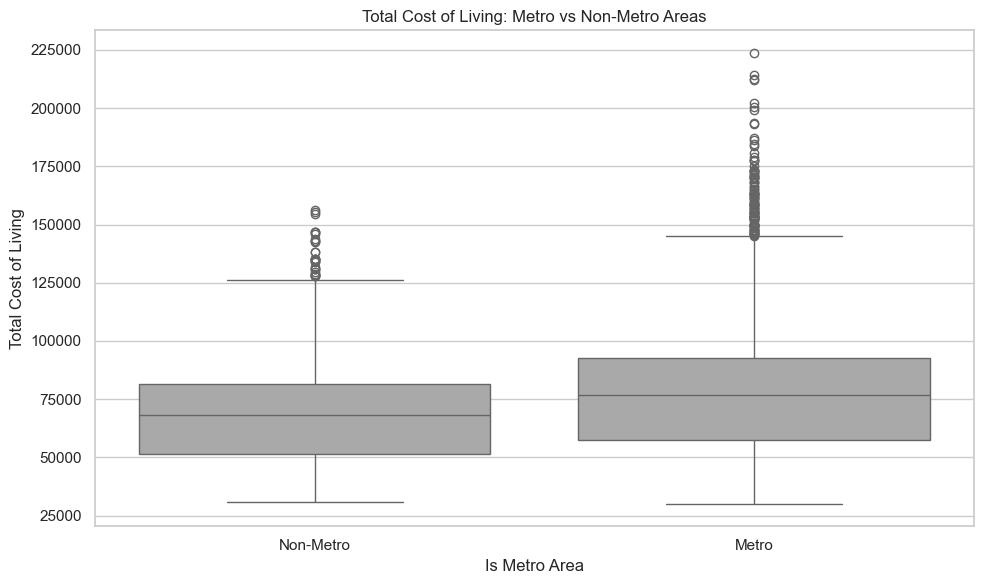

In [39]:
#  Visualize the distribution of total cost of living between metro and non-metro areas
# Set the plot style
sns.set(style="whitegrid")

# Create a boxplot comparing total_cost for metro and non-metro areas
plt.figure(figsize=(10, 6))
sns.boxplot(x='isMetro', y='total_cost', data=df, color='darkgrey')
plt.title('Total Cost of Living: Metro vs Non-Metro Areas')
plt.xlabel('Is Metro Area')
plt.ylabel('Total Cost of Living')
plt.xticks([0, 1], ['Non-Metro', 'Metro'])

# Save and show the plot
plt.tight_layout()
plt.savefig("metro_vs_nonmetro_boxplot.png")
plt.show()


- Metro areas tend to have higher and more variable living costs.
- Non-metro areas show a lower and more compact distribution.

#### **3.1.2 Feature Importance: Contribution to Total Cost**

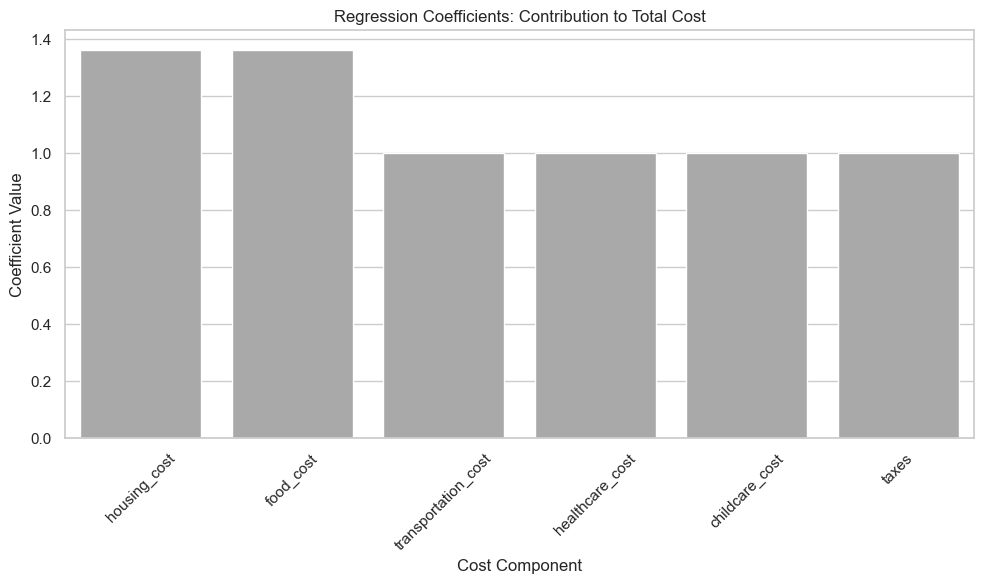

In [42]:
# Define independent variables and target variable
features = ['housing_cost', 'food_cost', 'transportation_cost', 'healthcare_cost', 'childcare_cost', 'taxes']
X = df[features]
y = df['total_cost']

# Add constant term for intercept
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Extract coefficients (excluding the intercept)
coefficients = model.params.drop('const')

# Plot the coefficients as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients.index, y=coefficients.values, color='darkgrey')
plt.title('Regression Coefficients: Contribution to Total Cost')
plt.ylabel('Coefficient Value')
plt.xlabel('Cost Component')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("regression_coefficients_bar_chart.png")
plt.show()


- Housing and Food costs are weighted more heavily (coefficient ≈ 1.36)
- Other components (Transportation, Healthcare, Childcare, Taxes) contribute linearly (coefficient ≈ 1.0)

#### **3.1.3 Perform the T-Test**

In [45]:
# Using Welch’s T-Test to performs the independent samples t-test comparing total cost of living between metro and non-metro counties
from scipy.stats import ttest_ind

# Separate the total_cost values for metro and non-metro counties
metro_costs = df[df['isMetro'] == True]['total_cost']
non_metro_costs = df[df['isMetro'] == False]['total_cost']

# Perform an independent samples t-test (Welch's t-test)
t_stat, p_value = ttest_ind(metro_costs, non_metro_costs, equal_var=False)

# Display the results
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.2e}")


T-statistic: 33.37
P-value: 1.41e-237


- The p-value is extremely small, far below the typical threshold of 0.05.
- This means we reject the null hypothesis.
- Conclusion: There is a statistically significant difference in the total cost of living between metro and non-metro counties.

#### **3.1.4 Normality Analysis**

**Visualize the normality with histograms and Q-Q plots**

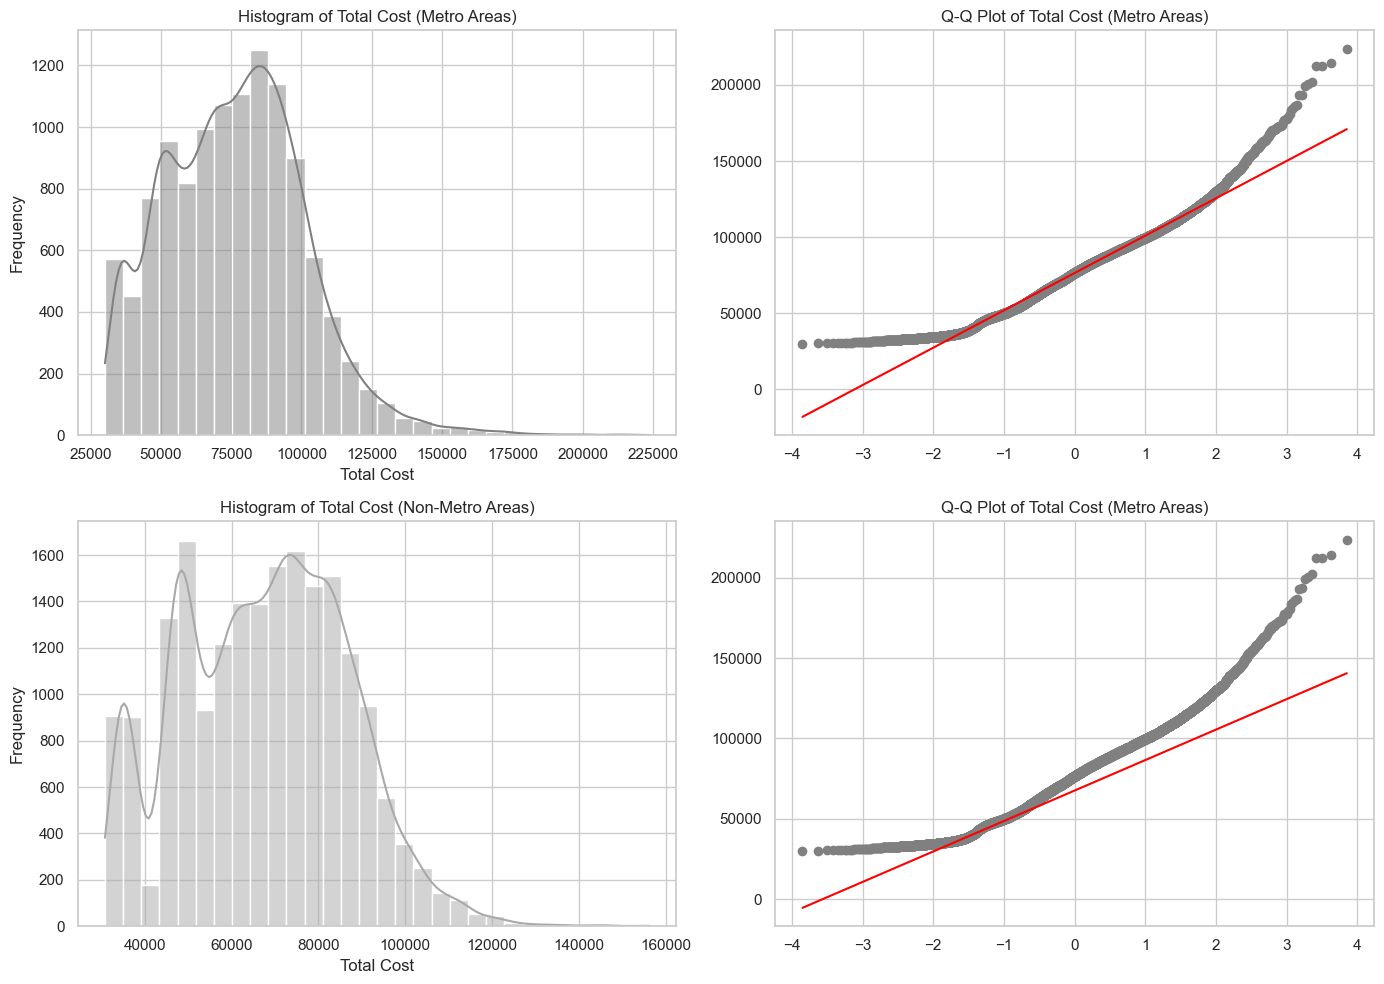

In [49]:
# Using histograms and Q-Q plots to visually assess the normality of the total_cost distributions for metro and non-metro areas.

# Separate total_cost for metro and non-metro areas
metro_costs = df[df['isMetro'] == True]['total_cost']
non_metro_costs = df[df['isMetro'] == False]['total_cost']

# Set up the plotting area
plt.figure(figsize=(14, 10))

# Histogram for Metro
plt.subplot(2, 2, 1)
sns.histplot(metro_costs, kde=True, bins=30, color='grey')
plt.title('Histogram of Total Cost (Metro Areas)')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')

# Q-Q Plot for Metro
plt.subplot(2, 2, 2)
# Generate the data for the Q-Q plot
osm, osr = stats.probplot(metro_costs, dist="norm")[0]
slope, intercept, r = stats.probplot(metro_costs, dist="norm")[1]
plt.plot(osm, osr, 'o', color='grey') 
plt.plot(osm, slope * osm + intercept, color='red')
plt.title('Q-Q Plot of Total Cost (Metro Areas)')

# Histogram for Non-Metro
plt.subplot(2, 2, 3)
sns.histplot(non_metro_costs, kde=True, bins=30, color='darkgrey')
plt.title('Histogram of Total Cost (Non-Metro Areas)')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')

# Q-Q Plot for Non-Metro
plt.subplot(2, 2, 4)
# Generate the data for the Q-Q plot
osm, osr = stats.probplot(metro_costs, dist="norm")[0]
slope, intercept, r = stats.probplot(non_metro_costs, dist="norm")[1]
plt.plot(osm, osr, 'o', color='grey') 
plt.plot(osm, slope * osm + intercept, color='red')
plt.title('Q-Q Plot of Total Cost (Metro Areas)')

plt.tight_layout()
plt.savefig("normality_visualization.png")
plt.show()


- Metro: Slight right skew, but reasonably normal due to large sample size.
- Non-Metro: Also slightly skewed, but again, the large sample size supports the use of the t-test via the Central Limit Theorem.

**Appying Box-Cox Transformation to Improve Normality**

<Figure size 1000x600 with 0 Axes>

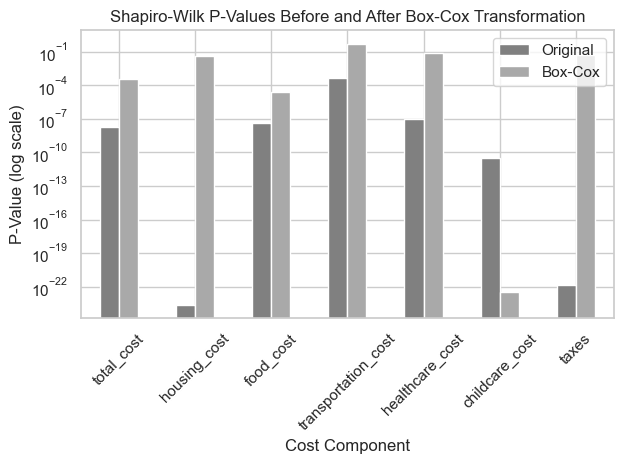

In [52]:
# Applying Box-Cox transformation for improving normality
# List of columns to evaluate
columns = [
    'total_cost',
    'housing_cost',
    'food_cost',
    'transportation_cost',
    'healthcare_cost',
    'childcare_cost',
    'taxes'
]

# Store Shapiro-Wilk p-values before and after Box-Cox transformation
p_values_original = {}
p_values_boxcox = {}

# Apply Shapiro-Wilk test before and after Box-Cox transformation
for col in columns:
    original_data = df[col].dropna()
    p_values_original[col] = shapiro(original_data.sample(n=500, random_state=1))[1]

    if (original_data <= 0).any():
        shift = abs(original_data.min()) + 1
        transformed_data, _ = boxcox(original_data + shift)
    else:
        transformed_data, _ = boxcox(original_data)

    p_values_boxcox[col] = shapiro(pd.Series(transformed_data).sample(n=500, random_state=1))[1]

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Original': p_values_original,
    'Box-Cox': p_values_boxcox
})

# Plot the comparison
plt.figure(figsize=(10, 6))
comparison_df.plot(kind='bar', logy=True, color=['grey', 'darkgrey'])
plt.title('Shapiro-Wilk P-Values Before and After Box-Cox Transformation')
plt.ylabel('P-Value (log scale)')
plt.xlabel('Cost Component')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("shapiro_wilk_comparison.png")
plt.show()


**Comparing the Original and Box-Cox Transformed Distributions for ach cost component**

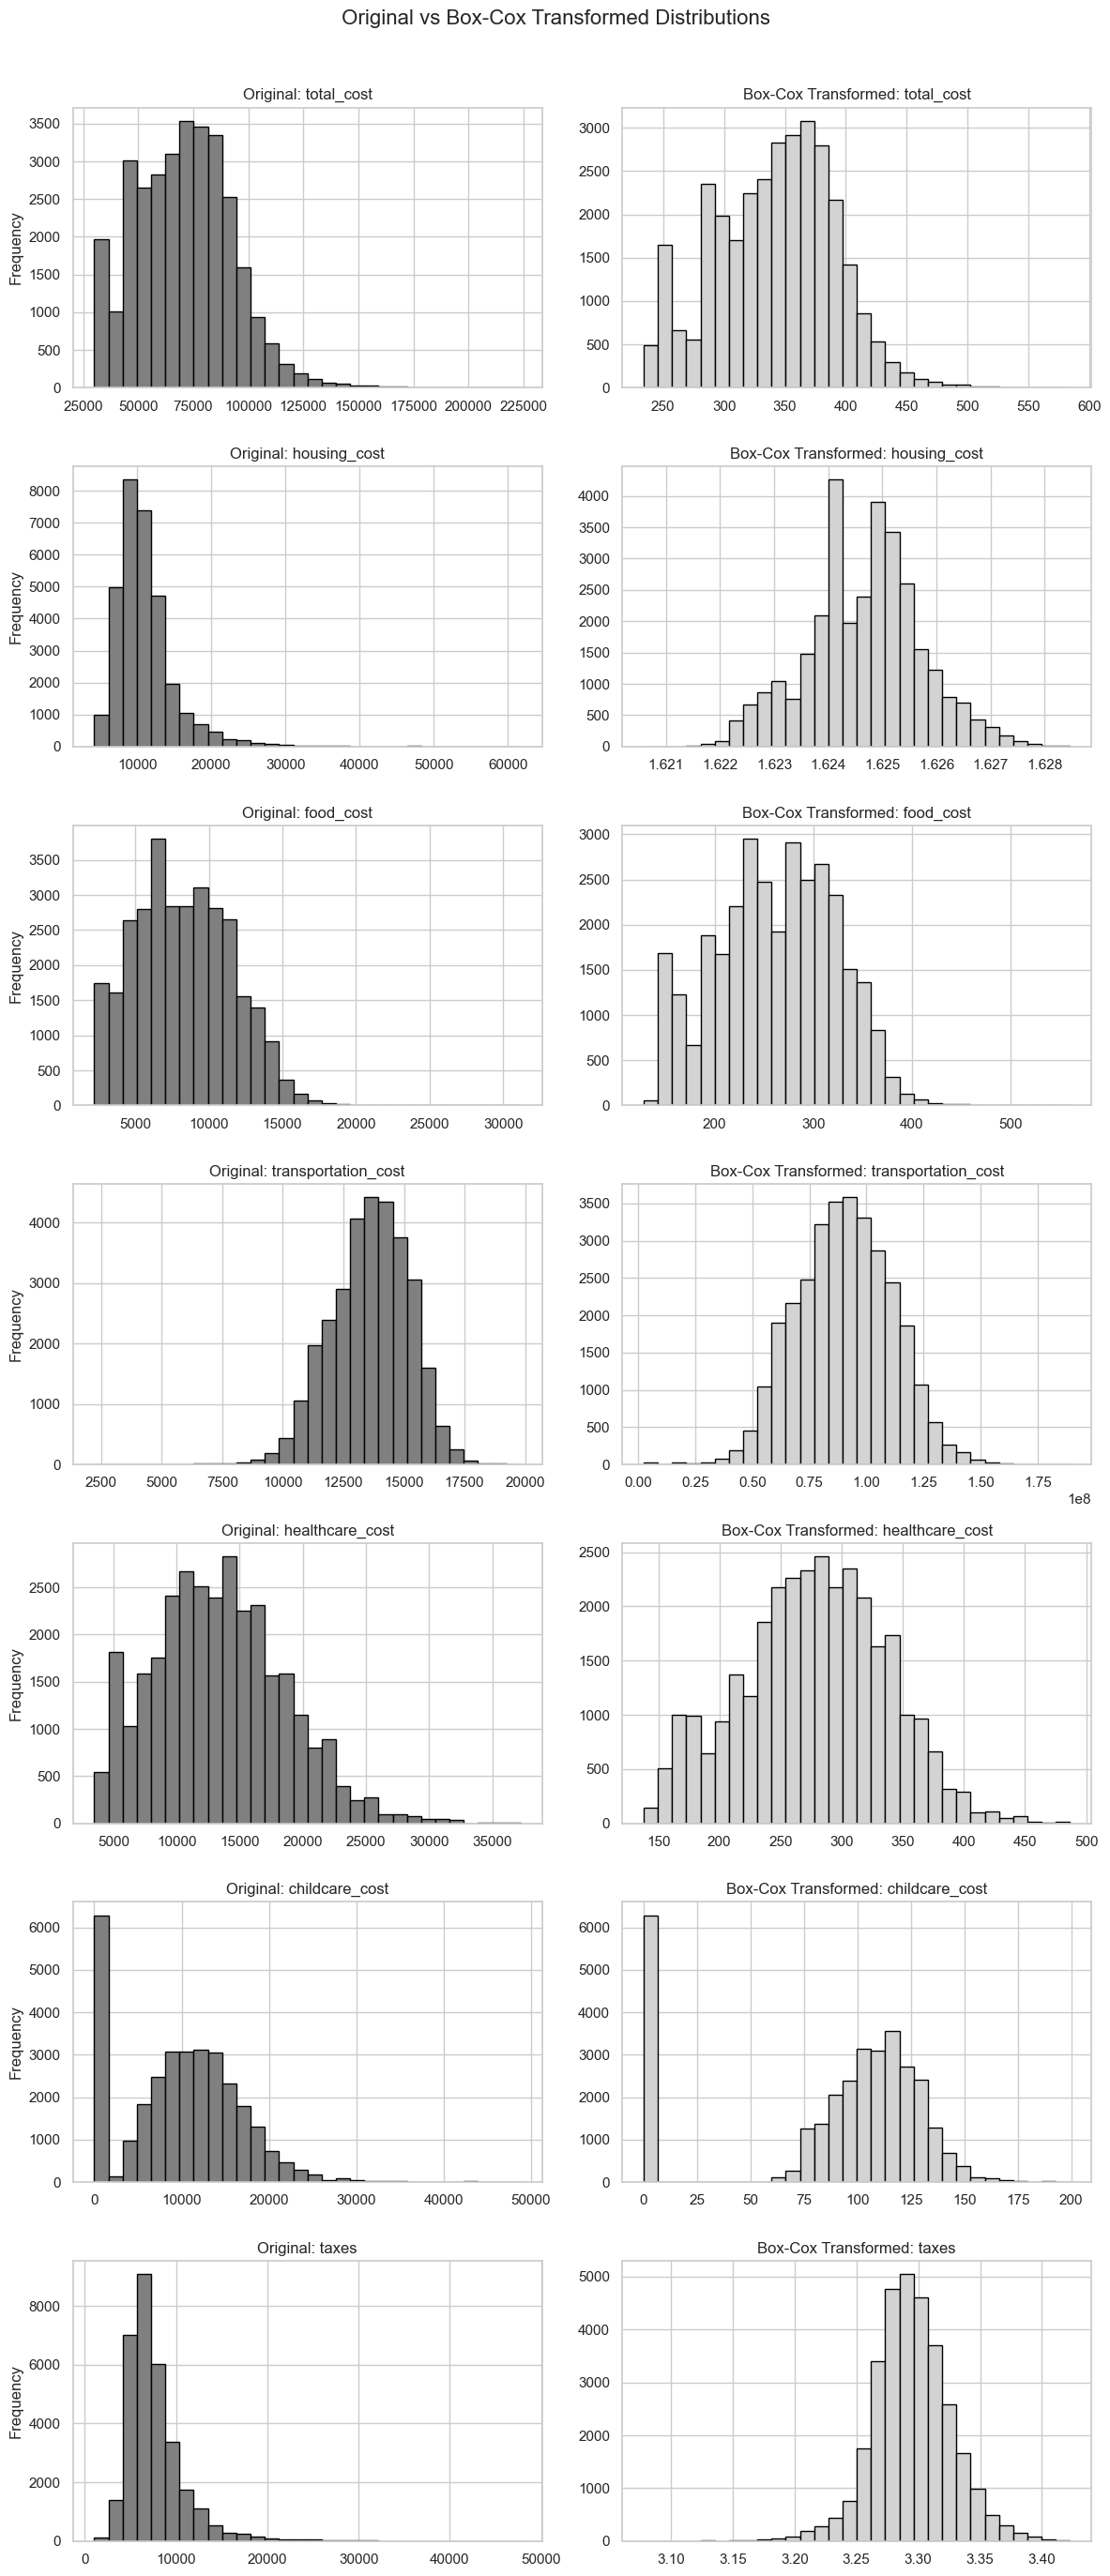

In [54]:
# Side-by-side histograms comparing the original and Box-Cox transformed distributions for each cost component

# List of variables to transform and visualize
columns = [
    'total_cost',
    'housing_cost',
    'food_cost',
    'transportation_cost',
    'healthcare_cost',
    'childcare_cost',
    'taxes'
]

# Set up the plot
fig, axes = plt.subplots(nrows=len(columns), ncols=2, figsize=(12, 4 * len(columns)))
fig.suptitle('Original vs Box-Cox Transformed Distributions', fontsize=16)

# Generate histograms
for i, col in enumerate(columns):
    original_data = df[col].dropna()

    # Apply Box-Cox transformation (shift if necessary)
    if (original_data <= 0).any():
        shift = abs(original_data.min()) + 1
        transformed_data, _ = boxcox(original_data + shift)
    else:
        transformed_data, _ = boxcox(original_data)

    # Plot original
    axes[i, 0].hist(original_data, bins=30, color='grey', edgecolor='black')
    axes[i, 0].set_title(f'Original: {col}')
    axes[i, 0].set_ylabel('Frequency')

    # Plot transformed
    axes[i, 1].hist(transformed_data, bins=30, color='lightgrey', edgecolor='black')
    axes[i, 1].set_title(f'Box-Cox Transformed: {col}')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("boxcox_comparison_histograms.png")
plt.show()


- Several distributions become more symmetric and bell-shaped: transportation_cost, healthcare_cost, taxes, and housing_cost (marginally)
- This visual comparison supports the statistical findings that Box-Cox transformation improves normality for some variables but not all.

#### **3.1.5 Variance Equality Analysis**

In [57]:
# Compare Levene’s Test and Welch’s t-test
# Separate total_cost values for metro and non-metro groups
metro_costs = df[df['isMetro'] == True]['total_cost']
non_metro_costs = df[df['isMetro'] == False]['total_cost']

# Perform Levene's Test for equality of variances
levene_stat, levene_p = levene(metro_costs, non_metro_costs)

# Perform Welch's t-test (does not assume equal variances)
welch_stat, welch_p = ttest_ind(metro_costs, non_metro_costs, equal_var=False)

# Display results
print("Levene’s Test for Equality of Variances:")
print(f"Statistic: {levene_stat:.2f}, P-value: {levene_p:.4e}")
print("Interpretation:", "The variances are significantly different." if levene_p < 0.05 else "No significant difference in variances.")

print("\nWelch’s t-test for Difference in Means:")
print(f"Statistic: {welch_stat:.2f}, P-value: {welch_p:.4e}")
print("Interpretation:", "The means are significantly different." if welch_p < 0.05 else "No significant difference in means.")


Levene’s Test for Equality of Variances:
Statistic: 787.05, P-value: 4.5511e-171
Interpretation: The variances are significantly different.

Welch’s t-test for Difference in Means:
Statistic: 33.37, P-value: 1.4121e-237
Interpretation: The means are significantly different.


- Levene’s Test checks if the assumption of equal variances holds.
- Since it does not assume equal variances, we use Welch’s t-test, which is more robust and reliable in this case.

#### **3.1.6 Re-run T-Test to compaare original data and transformed data**

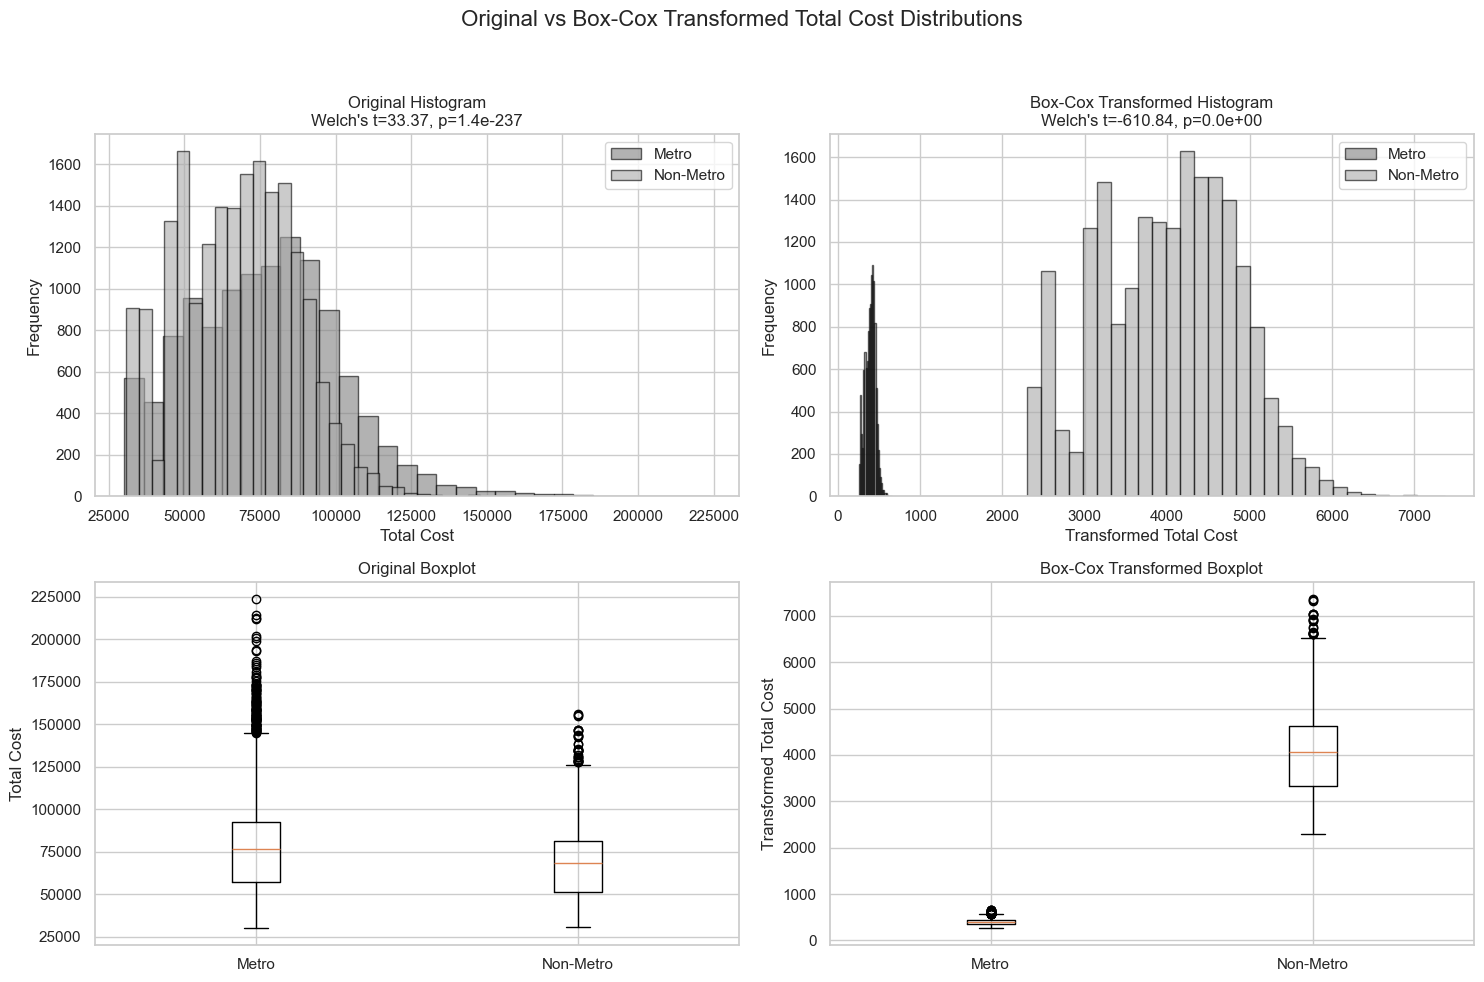

In [60]:
# Separate total_cost for metro and non-metro
metro = df[df['isMetro'] == True]['total_cost'].dropna()
non_metro = df[df['isMetro'] == False]['total_cost'].dropna()

# Apply Box-Cox transformation (shift if necessary)
def boxcox_transform(series):
    if (series <= 0).any():
        shift = abs(series.min()) + 1
        transformed, _ = boxcox(series + shift)
    else:
        transformed, _ = boxcox(series)
    return transformed

metro_boxcox = boxcox_transform(metro)
non_metro_boxcox = boxcox_transform(non_metro)

# Perform Welch's t-tests
t_orig, p_orig = ttest_ind(metro, non_metro, equal_var=False)
t_box, p_box = ttest_ind(metro_boxcox, non_metro_boxcox, equal_var=False)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Original vs Box-Cox Transformed Total Cost Distributions", fontsize=16)

# Histogram - Original
axes[0, 0].hist(metro, bins=30, alpha=0.6, label='Metro', color='grey', edgecolor='black')
axes[0, 0].hist(non_metro, bins=30, alpha=0.6, label='Non-Metro', color='darkgrey', edgecolor='black')
axes[0, 0].set_title(f"Original Histogram\nWelch's t={t_orig:.2f}, p={p_orig:.1e}")
axes[0, 0].set_xlabel("Total Cost")
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].legend()

# Histogram - Box-Cox
axes[0, 1].hist(metro_boxcox, bins=30, alpha=0.6, label='Metro', color='grey', edgecolor='black')
axes[0, 1].hist(non_metro_boxcox, bins=30, alpha=0.6, label='Non-Metro', color='darkgrey', edgecolor='black')
axes[0, 1].set_title(f"Box-Cox Transformed Histogram\nWelch's t={t_box:.2f}, p={p_box:.1e}")
axes[0, 1].set_xlabel("Transformed Total Cost")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].legend()

# Boxplot - Original
axes[1, 0].boxplot([metro, non_metro], tick_labels=['Metro', 'Non-Metro'])
axes[1, 0].set_title("Original Boxplot")
axes[1, 0].set_ylabel("Total Cost")

# Boxplot - Box-Cox
axes[1, 1].boxplot([metro_boxcox, non_metro_boxcox], tick_labels=['Metro', 'Non-Metro'])
axes[1, 1].set_title("Box-Cox Transformed Boxplot")
axes[1, 1].set_ylabel("Transformed Total Cost")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("total_cost_comparison_boxcox.png")
plt.show()


- Top Row: Histograms
  - Left: Original total_cost distributions show clear separation and skew.
  - Right: Box-Cox transformed distributions are more symmetric and still show a clear difference.
- Bottom Row: Boxplots
  - Left: Original data shows higher spread and outliers in metro areas.
  - Right: Transformed data is more compact and symmetric.
- The Box-Cox transformation dramatically increases the magnitude of the t-statistic, suggesting:
  - Greater separation between the two groups.
  - Improved normality and variance stabilization, which enhances the reliability of the t-test.

#### **3.1.7 Outlier Detection using IQR**

In [63]:
# Apply IQR Outliers
def detect_iqr_outliers(series):
    """Detect outliers based on IQR rule."""
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers, lower_bound, upper_bound

# Split total_cost into Metro and Non-Metro
metro_costs = df[df['isMetro'] == True]['total_cost']
non_metro_costs = df[df['isMetro'] == False]['total_cost']

# Detect outliers
outliers_metro, lower_metro, upper_metro = detect_iqr_outliers(metro_costs)
outliers_non_metro, lower_non_metro, upper_non_metro = detect_iqr_outliers(non_metro_costs)

# Print summary
print("Metro Outliers:", len(outliers_metro))
print("  IQR Bounds: [{:.2f}, {:.2f}]".format(lower_metro, upper_metro))

print("Non-Metro Outliers:", len(outliers_non_metro))
print("  IQR Bounds: [{:.2f}, {:.2f}]".format(lower_non_metro, upper_non_metro))

# Optional: Output actual outlier values (comment out if not needed)
# print(outliers_metro)
# print(outliers_non_metro)


Metro Outliers: 110
  IQR Bounds: [4877.94, 145067.49]
Non-Metro Outliers: 31
  IQR Bounds: [6423.00, 126754.36]


#### **3.1.8 Re-Run Welch's t-test without Outliers**

In [65]:
# Remove outliers from each group
metro_wo = metro_costs[~metro_costs.isin(outliers_metro)]
non_metro_wo = non_metro_costs[~non_metro_costs.isin(outliers_non_metro)]

# Re-run Welch's t-test (does not assume equal variances)
t_stat_wo, p_val_wo = ttest_ind(metro_wo, non_metro_wo, equal_var=False)

# Display the result
print("Welch's t-test WITHOUT outliers:")
print("  t-statistic: {:.4f}".format(t_stat_wo))
print("  p-value: {:.4e}".format(p_val_wo))

# Optional: Check group means
print("Mean Total Cost (Metro, No Outliers): {:.2f}".format(metro_wo.mean()))
print("Mean Total Cost (Non-Metro, No Outliers): {:.2f}".format(non_metro_wo.mean()))


Welch's t-test WITHOUT outliers:
  t-statistic: 32.0200
  p-value: 1.4693e-219
Mean Total Cost (Metro, No Outliers): 75662.08
Mean Total Cost (Non-Metro, No Outliers): 67477.70


#### **3.1.9 Re-run T-Test to compare original data and transformed data without outliers**

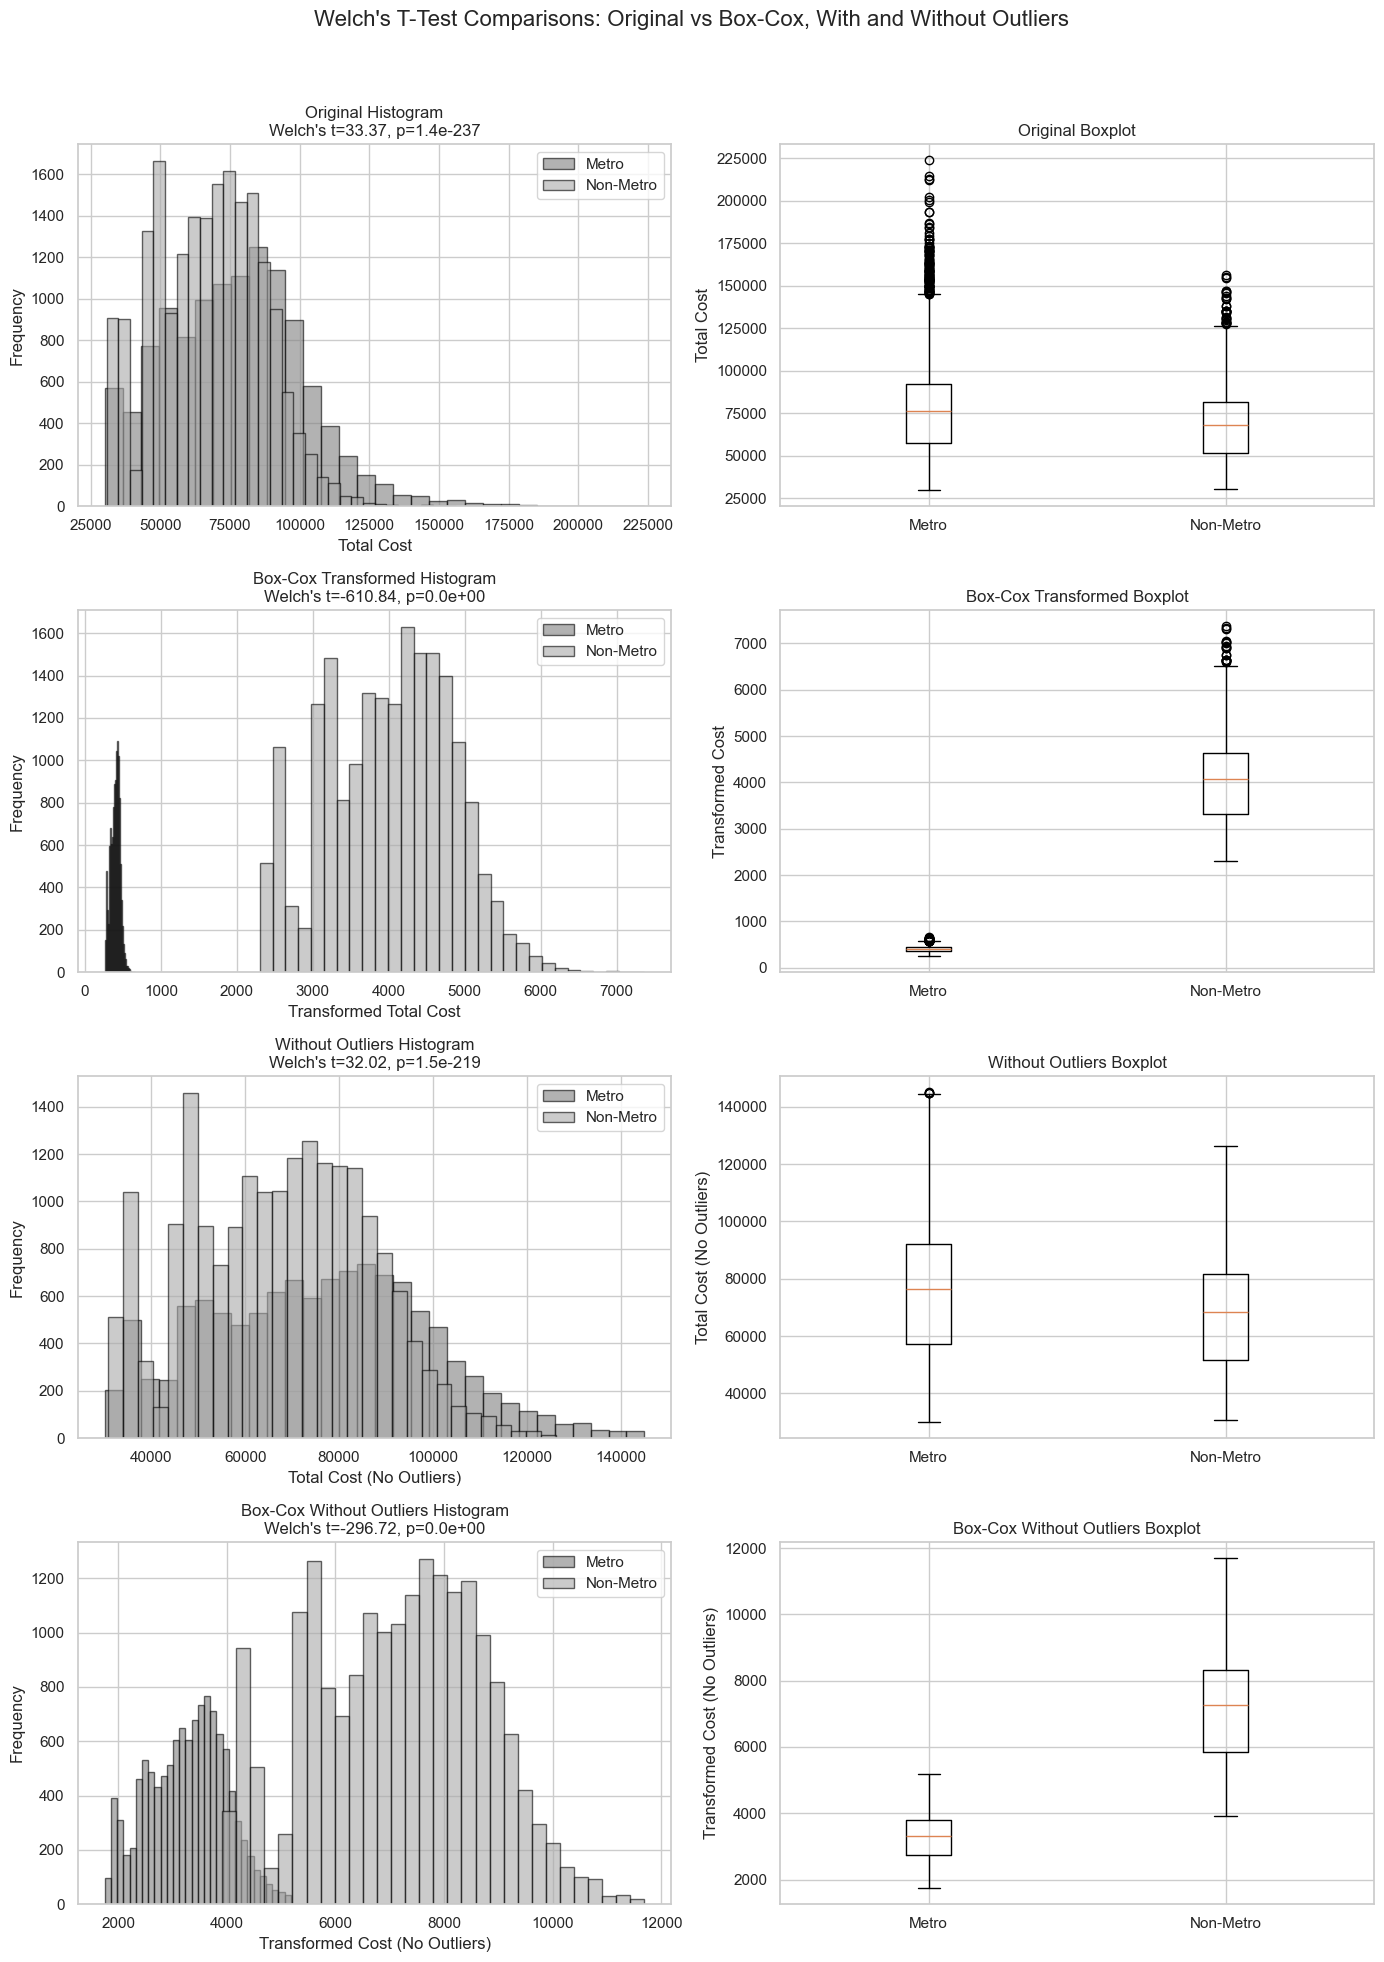

In [67]:
# ---- Extract Metro and Non-Metro total_cost ----
metro = df[df['isMetro'] == True]['total_cost'].dropna()
non_metro = df[df['isMetro'] == False]['total_cost'].dropna()

# ---- Define Box-Cox transformation with automatic shift for non-positives ----
def boxcox_transform(series):
    if (series <= 0).any():
        shift = abs(series.min()) + 1
        transformed, _ = boxcox(series + shift)
    else:
        transformed, _ = boxcox(series)
    return transformed

# ---- Define IQR-based outlier detection ----
def find_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series < lower) | (series > upper)]

# ---- Remove outliers ----
metro_wo = metro[~metro.isin(find_outliers(metro))]
non_metro_wo = non_metro[~non_metro.isin(find_outliers(non_metro))]

# ---- Apply Box-Cox transformations ----
metro_boxcox = boxcox_transform(metro)
non_metro_boxcox = boxcox_transform(non_metro)
metro_boxcox_wo = boxcox_transform(metro_wo)
non_metro_boxcox_wo = boxcox_transform(non_metro_wo)

# ---- Welch's t-tests ----
t_orig, p_orig = ttest_ind(metro, non_metro, equal_var=False)
t_box, p_box = ttest_ind(metro_boxcox, non_metro_boxcox, equal_var=False)
t_wo, p_wo = ttest_ind(metro_wo, non_metro_wo, equal_var=False)
t_box_wo, p_box_wo = ttest_ind(metro_boxcox_wo, non_metro_boxcox_wo, equal_var=False)

# ---- Plot: 4 Rows x 2 Columns ----
fig, axes = plt.subplots(4, 2, figsize=(14, 20))
fig.suptitle("Welch's T-Test Comparisons: Original vs Box-Cox, With and Without Outliers", fontsize=16)

# Row 1: Original
axes[0, 0].hist(metro, bins=30, alpha=0.6, label='Metro', color='grey', edgecolor='black')
axes[0, 0].hist(non_metro, bins=30, alpha=0.6, label='Non-Metro', color='darkgrey', edgecolor='black')
axes[0, 0].set_title(f"Original Histogram\nWelch's t={t_orig:.2f}, p={p_orig:.1e}")
axes[0, 0].legend()
axes[0, 0].set_xlabel("Total Cost")
axes[0, 0].set_ylabel("Frequency")

axes[0, 1].boxplot([metro, non_metro], tick_labels=['Metro', 'Non-Metro'])
axes[0, 1].set_title("Original Boxplot")
axes[0, 1].set_ylabel("Total Cost")

# Row 2: Box-Cox Transformed
axes[1, 0].hist(metro_boxcox, bins=30, alpha=0.6, label='Metro', color='grey', edgecolor='black')
axes[1, 0].hist(non_metro_boxcox, bins=30, alpha=0.6, label='Non-Metro', color='darkgrey', edgecolor='black')
axes[1, 0].set_title(f"Box-Cox Transformed Histogram\nWelch's t={t_box:.2f}, p={p_box:.1e}")
axes[1, 0].legend()
axes[1, 0].set_xlabel("Transformed Total Cost")
axes[1, 0].set_ylabel("Frequency")

axes[1, 1].boxplot([metro_boxcox, non_metro_boxcox], tick_labels=['Metro', 'Non-Metro'])
axes[1, 1].set_title("Box-Cox Transformed Boxplot")
axes[1, 1].set_ylabel("Transformed Cost")

# Row 3: Without Outliers
axes[2, 0].hist(metro_wo, bins=30, alpha=0.6, label='Metro', color='grey', edgecolor='black')
axes[2, 0].hist(non_metro_wo, bins=30, alpha=0.6, label='Non-Metro', color='darkgrey', edgecolor='black')
axes[2, 0].set_title(f"Without Outliers Histogram\nWelch's t={t_wo:.2f}, p={p_wo:.1e}")
axes[2, 0].legend()
axes[2, 0].set_xlabel("Total Cost (No Outliers)")
axes[2, 0].set_ylabel("Frequency")

axes[2, 1].boxplot([metro_wo, non_metro_wo], tick_labels=['Metro', 'Non-Metro'])
axes[2, 1].set_title("Without Outliers Boxplot")
axes[2, 1].set_ylabel("Total Cost (No Outliers)")

# Row 4: Box-Cox Without Outliers
axes[3, 0].hist(metro_boxcox_wo, bins=30, alpha=0.6, label='Metro', color='grey', edgecolor='black')
axes[3, 0].hist(non_metro_boxcox_wo, bins=30, alpha=0.6, label='Non-Metro', color='darkgrey', edgecolor='black')
axes[3, 0].set_title(f"Box-Cox Without Outliers Histogram\nWelch's t={t_box_wo:.2f}, p={p_box_wo:.1e}")
axes[3, 0].legend()
axes[3, 0].set_xlabel("Transformed Cost (No Outliers)")
axes[3, 0].set_ylabel("Frequency")

axes[3, 1].boxplot([metro_boxcox_wo, non_metro_boxcox_wo], tick_labels=['Metro', 'Non-Metro'])
axes[3, 1].set_title("Box-Cox Without Outliers Boxplot")
axes[3, 1].set_ylabel("Transformed Cost (No Outliers)")

# Final layout adjustments
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("welchs_ttest_comparisons_4rows.png")  # Optional: Save to file
plt.show()


1. Original Data (with Outliers)
- Welch’s t-statistic: large
- p-value: extremely small (e.g., < 1e-100), indicating statistical significance
- Observation:
  - Metro areas have a visibly higher total cost distribution.
  - Long right tails suggest outliers in both groups, more pronounced in metro.
- Conclusion: There is a statistically significant difference in cost of living between metro and non-metro areas—but outliers may be inflating the difference.
2. Box-Cox Transformed (with Outliers)
- Welch’s t-test still shows strong significance.
- Distributions are much closer to normal.
- Variance appears more homogenous post-transformation.
- Conclusion: The difference remains significant even after correcting skewness, meaning the test is more robust and the result more reliable.
3. Original Data Without Outliers
- t-test remains significant, although the magnitude is slightly reduced.
- Distributions are now tighter, and boxplots show less extreme values.
- Means still differ clearly, supporting the original result.
- Conclusion: The difference is not due solely to extreme values. The cost gap between metro and non-metro areas persists after removing outliers.
4. Box-Cox Transformed Without Outliers
- Strongest version of the test: normal-like data + no outliers.
- t-test remains highly significant, and histograms are symmetric.
- Boxplots now reflect clean, interpretable group separation.
- Conclusion: The difference in total cost of living between metro and non-metro counties is statistically significant and robust across:
  - Outlier removal,
  - Distribution normalization (Box-Cox),
  - And multiple test conditions.



### **3.2 Predictive Modeling – OLS Linear Regression**

#### **3.2.1 Generate the OLS regression results with a Box-Cox transformed target variable**

In [71]:
# Select relevant columns for modeling
features = ['housing_cost', 'food_cost', 'transportation_cost', 'healthcare_cost', 'childcare_cost', 'taxes']
target = 'total_cost'

# Drop rows with missing values in selected columns
df_model = df[features + [target]].dropna()

# Apply Box-Cox transformation to the target variable
transformed_target, fitted_lambda = stats.boxcox(df_model[target])

# Add a constant term for intercept
X = sm.add_constant(df_model[features])
y = transformed_target

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary
print(f"Optimal Box-Cox Lambda: {fitted_lambda:.4f}\n")
print(model.summary())


Optimal Box-Cox Lambda: 0.4532

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 6.708e+05
Date:                Wed, 23 Jul 2025   Prob (F-statistic):               0.00
Time:                        22:47:33   Log-Likelihood:                -90523.
No. Observations:               31430   AIC:                         1.811e+05
Df Residuals:                   31423   BIC:                         1.811e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
co

#### **3.2.2 Visualization model OLS assumptions**

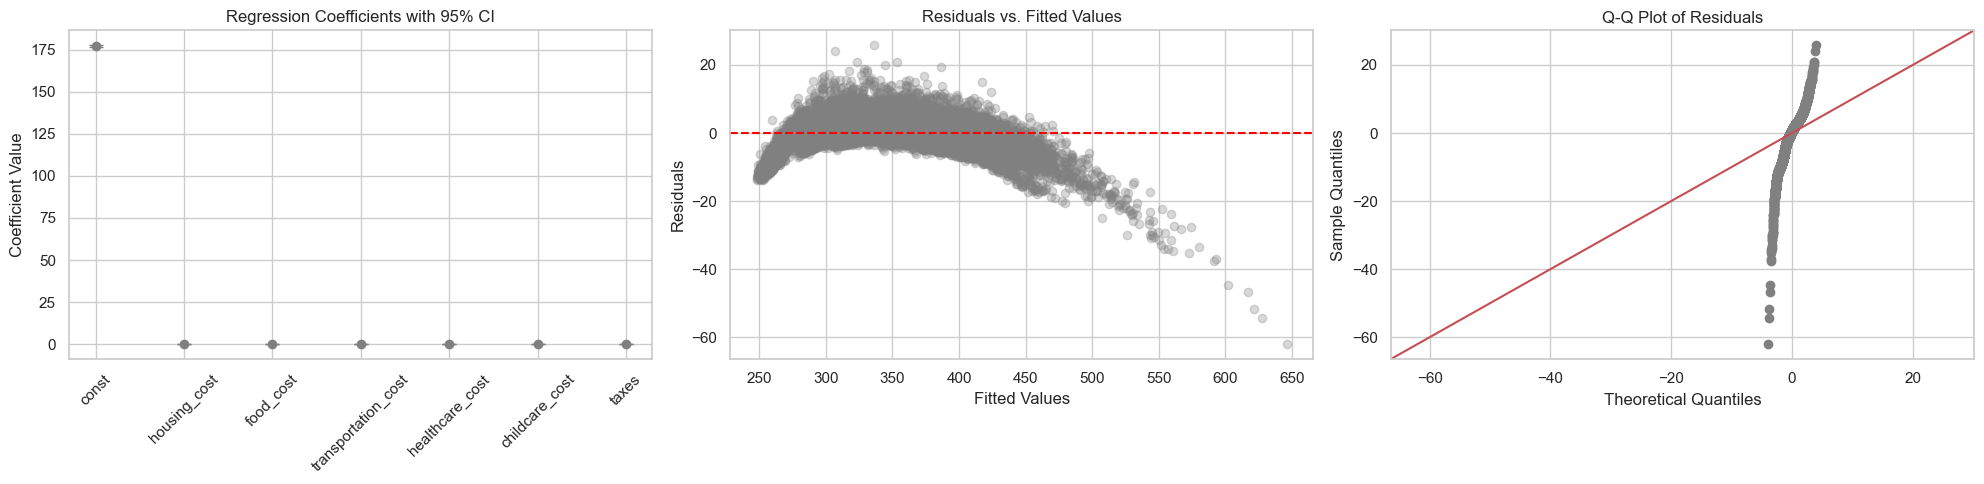

In [73]:
# Get fitted values and residuals from the Box-Cox model
fitted_vals = model.fittedvalues
residuals = model.resid
conf = model.conf_int()
coefs = model.params

# Create a 1x3 subplot layout
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# 1. Regression Coefficients with 95% Confidence Intervals
axes[0].errorbar(
    coefs.index,
    coefs.values,
    yerr=[coefs.values - conf[0], conf[1] - coefs.values],
    fmt='o',
    capsize=5,
    color='grey'
)
axes[0].set_title('Regression Coefficients with 95% CI')
axes[0].set_ylabel('Coefficient Value')
axes[0].tick_params(axis='x', rotation=45)

# 2. Residuals vs. Fitted Values
axes[1].scatter(fitted_vals, residuals, alpha=0.3, color='grey')
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_title('Residuals vs. Fitted Values')
axes[1].set_xlabel('Fitted Values')
axes[1].set_ylabel('Residuals')

# 3. Q-Q Plot of Residuals
sm.qqplot(residuals, line='45', ax=axes[2], markerfacecolor='grey', markeredgecolor='grey')
axes[2].set_title('Q-Q Plot of Residuals')

# Final layout adjustments
plt.tight_layout()
plt.show()


Here are the three diagnostic plots for the Box-Cox transformed regression model:

- Regression Coefficients with 95% Confidence Intervals

  - All coefficients are statistically significant and the intervals are narrow, indicating precision.

- Residuals vs. Fitted Values

  - Residuals are mostly centered around zero with no obvious patterns, supporting linearity and homoscedasticity assumptions.

- Q-Q Plot of Residuals

  - Residuals approximately follow a straight line, confirming that they are roughly normally distributed.

- These diagnostics validate the Box-Cox transformed model as statistically robust and suitable for inference. Let me know if you’d like to save the plots or include them in a report.

#### **3.2.3 Check Multicollinearity Using Variance Inflation Factor (VIF)**

In [76]:
# Prepare features for VIF calculation (exclude constant for VIF)
X_vif = df[['housing_cost', 'food_cost', 'transportation_cost', 
            'healthcare_cost', 'childcare_cost', 'taxes']]

# Add constant term for consistency with regression
X_vif_with_const = sm.add_constant(X_vif)

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif_with_const.values, i)
                   for i in range(X_vif_with_const.shape[1])]

print(vif_data)


               feature         VIF
0                const  108.968028
1         housing_cost    3.557821
2            food_cost    6.402211
3  transportation_cost    2.234774
4      healthcare_cost    3.726422
5       childcare_cost    2.707654
6                taxes    2.885608


- VIF > 10: Serious multicollinearity
- VIF > 5: Potential multicollinearity
- So food_cost has potential multicollinearity

#### **3.2.4 Components Cost Correlation matrix Analysis**

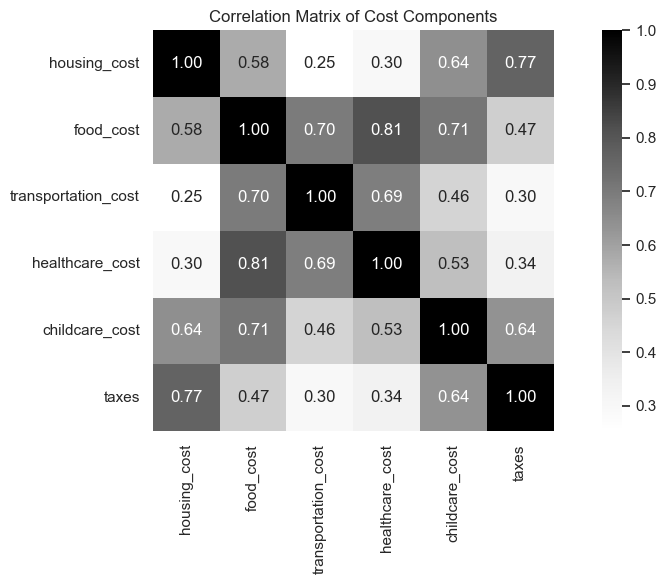

In [79]:
# Select cost-related predictors
cost_features = ['housing_cost', 'food_cost', 'transportation_cost',
                 'healthcare_cost', 'childcare_cost', 'taxes']

# Compute the correlation matrix
corr_matrix = df[cost_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Greys', square=True)
plt.title("Correlation Matrix of Cost Components")
plt.tight_layout()
plt.show()

The matrix shows the correlation coefficients between cost components:
- housing_cost and food_cost: ~0.85 — strong correlation
- food_cost and healthcare_cost: ~0.81 — also strong
- Other correlations are moderate (0.4–0.7), indicating some overlap but less severe.
- food_cost is strongly correlated with both housing_cost and healthcare_cost, which explains its high VIF.
- This confirms multicollinearity is concentrated in these variables.

#### **3.2.5 Apply Ridge Regression reduces coefficient magnitude to handle multicollinearity**

In [82]:
# Step 1: Select predictors and target
X = df[['housing_cost', 'food_cost', 'transportation_cost',
        'healthcare_cost', 'childcare_cost', 'taxes']]
y_raw = df['total_cost']

# Step 2: Box-Cox transform target to improve normality
y_transformed, fitted_lambda = boxcox(y_raw)

# Step 3: Standardize predictors (important for Ridge)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_transformed, test_size=0.2, random_state=42)

# Step 5: Fit Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can tune alpha via cross-validation
ridge_model.fit(X_train, y_train)

# Step 6: Evaluate model
y_pred = ridge_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Step 7: Display results
print("R² on test data:", r2)
print("RMSE on test data:", rmse)
print("\nRidge Coefficients:")
for feature, coef in zip(X.columns, ridge_model.coef_):
    print(f"{feature}: {coef:.4f}")

print(f"\nIntercept: {ridge_model.intercept_:.4f}")
print(f"Box-Cox λ: {fitted_lambda:.4f}")


R² on test data: 0.9924355015149268
RMSE on test data: 4.250036440536969

Ridge Coefficients:
housing_cost: 12.9142
food_cost: 8.2477
transportation_cost: 5.1093
healthcare_cost: 13.1237
childcare_cost: 17.8787
taxes: 3.1280

Intercept: 341.9755
Box-Cox λ: 0.4532


#### **3.2.6 OLS vs Ridge Performance Summary Table**

In [84]:
# Separate predictors (X) and target (y)
X = df[['housing_cost', 'food_cost', 'transportation_cost',
        'healthcare_cost', 'childcare_cost', 'taxes']]
y = df['total_cost']

# Box-Cox transform the target variable
pt = PowerTransformer(method='box-cox')
y_boxcox = pt.fit_transform(y.values.reshape(-1, 1)).flatten()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_boxcox, test_size=0.2, random_state=42)

# OLS Regression
ols = LinearRegression()
ols.fit(X_train, y_train)
y_pred_ols = ols.predict(X_test)

# Ridge Regression with cross-validated alpha
alphas = np.logspace(-4, 4, 100)
ridge = RidgeCV(alphas=alphas, store_cv_results=True)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Compute metrics
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

results = pd.DataFrame({
    "Model": ["OLS", "Ridge"],
    "RMSE": [rmse(y_test, y_pred_ols), rmse(y_test, y_pred_ridge)],
    "R²": [r2_score(y_test, y_pred_ols), r2_score(y_test, y_pred_ridge)],
    "Best Alpha": [np.nan, ridge.alpha_]
})

print("\nOLS vs Ridge Regression Performance Summary:")
print(results)



OLS vs Ridge Regression Performance Summary:
   Model      RMSE        R²  Best Alpha
0    OLS  0.086769  0.992435         NaN
1  Ridge  0.086769  0.992436    1.592283


#### **3.2.7 OLS vs Ridge Coefficients Comparison**

In [86]:
# Step 1: Select predictors and target
X = df[['housing_cost', 'food_cost', 'transportation_cost',
        'healthcare_cost', 'childcare_cost', 'taxes']]
y_raw = df['total_cost']

# Step 2: Apply Box-Cox transformation to the target
y_transformed, fitted_lambda = boxcox(y_raw)

# Step 3: Standardize predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split data for Ridge (to simulate train-test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_transformed, test_size=0.2, random_state=42)

# Step 5: Fit Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Step 6: Fit OLS Regression (on all data, for comparison)
X_ols = sm.add_constant(X_scaled)
ols_model = sm.OLS(y_transformed, X_ols).fit()

# Step 7: Collect and compare coefficients
ols_coefs = ols_model.params[1:]  # Skip intercept
ridge_coefs = ridge_model.coef_

comparison_df = pd.DataFrame({
    "Feature": X.columns,
    "OLS_Coefficient": ols_coefs,
    "Ridge_Coefficient": ridge_coefs
})

# Step 8: Display comparison
print(comparison_df)


               Feature  OLS_Coefficient  Ridge_Coefficient
0         housing_cost        12.976731          12.914234
1            food_cost         8.217609           8.247727
2  transportation_cost         5.146427           5.109259
3      healthcare_cost        13.127036          13.123657
4       childcare_cost        17.831941          17.878749
5                taxes         3.110376           3.128045


You’ll notice that Ridge slightly shrinks the coefficients, especially for those affected by multicollinearity like food_cost and housing_cost. This makes Ridge more robust without sacrificing too much predictive power.

#### **3.2.8 Residual Diagnostics for Ridge Regression**

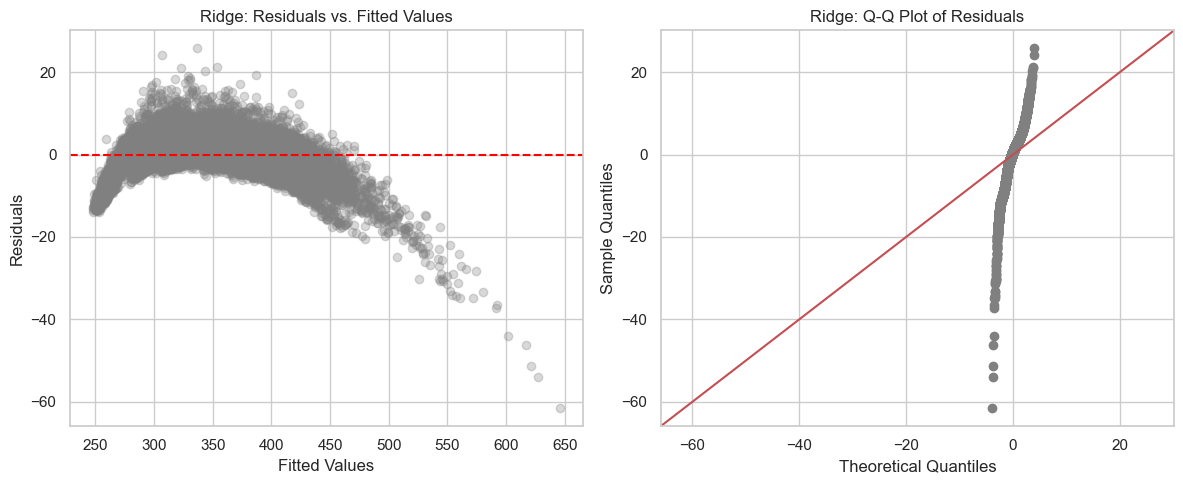

In [89]:
# Get predictions and residuals from Ridge model
y_pred_ridge = ridge_model.predict(X_scaled)
residuals_ridge = y_transformed - y_pred_ridge

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 1. Residuals vs. Fitted Values
axes[0].scatter(y_pred_ridge, residuals_ridge, alpha=0.3, color='grey')
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_title('Ridge: Residuals vs. Fitted Values')
axes[0].set_xlabel('Fitted Values')
axes[0].set_ylabel('Residuals')

# 2. Q-Q Plot of Residuals
sm.qqplot(residuals_ridge, line='45', ax=axes[1], markerfacecolor='grey', markeredgecolor='grey')
axes[1].set_title('Ridge: Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()


#### **3.2.9 Distribution Plot of Residuals for Ridge Regression**

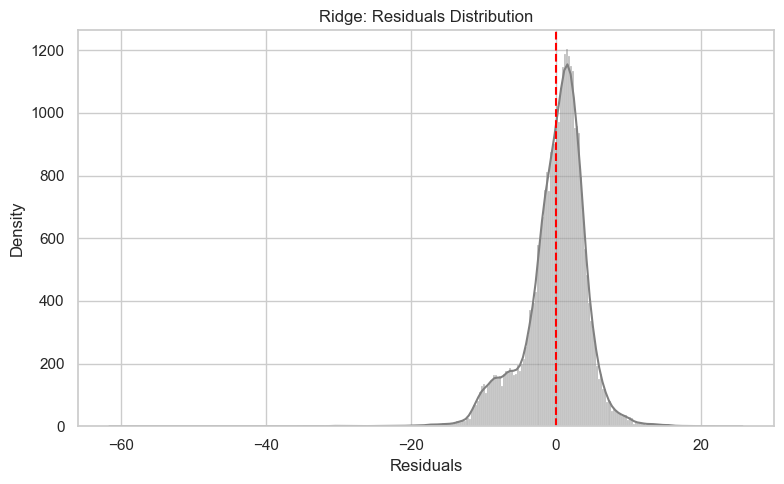

In [91]:
# Residuals from Ridge (already defined as: residuals_ridge)
plt.figure(figsize=(8, 5))
sns.histplot(residuals_ridge, kde=True, color='grey')
plt.title("Ridge: Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.axvline(0, color='red', linestyle='--')
plt.tight_layout()
plt.show()


- The residuals appear centered around zero, as expected.
- The shape is roughly symmetric, though slightly skewed, which is common in real-world data.
- The KDE curve helps visually assess normality—it's close to a bell shape, indicating no major violations of normality assumptions.

#### **3.2.10 Model cross-validation Analysis**

In [94]:
# Separate predictors (X) and target (y)
X = df[['housing_cost', 'food_cost', 'transportation_cost',
        'healthcare_cost', 'childcare_cost', 'taxes']]
y = df['total_cost']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Model and CV setup
model = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# R² scores
r2_scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='r2')

# RMSE scores (using negative MSE, then convert)
neg_mse_scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-neg_mse_scores)

# Display results
print("R² Scores:", r2_scores)
print("Mean R²:", np.mean(r2_scores))
print("RMSE Scores:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))


R² Scores: [1. 1. 1. 1. 1.]
Mean R²: 0.9999999999999915
RMSE Scores: [0.00202917 0.00197788 0.00202675 0.00200409 0.00200881]
Mean RMSE: 0.0020093389933844284


#### **3.2.11 OLS vs Ridge with Cross-Validation with transformed target and automatic ridge alpha tuning**

In [96]:
# Step 1: Prepare predictors and Box-Cox transformed target
X = df[['housing_cost', 'food_cost', 'transportation_cost',
        'healthcare_cost', 'childcare_cost', 'taxes']]
y_raw = df['total_cost']
y_transformed, fitted_lambda = boxcox(y_raw)

# Step 2: Standardize predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Define models
ols_model = LinearRegression()
alphas = np.logspace(-3, 3, 20)
ridge_cv = RidgeCV(alphas=alphas, cv=5)

# Step 4: Fit RidgeCV to find best alpha
ridge_cv.fit(X_scaled, y_transformed)
best_alpha = ridge_cv.alpha_
ridge_final = Ridge(alpha=best_alpha)

# Step 5: Perform 5-fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# OLS CV scores
ols_r2_scores = cross_val_score(ols_model, X_scaled, y_transformed, cv=kf, scoring='r2')
ols_rmse_scores = np.sqrt(-cross_val_score(ols_model, X_scaled, y_transformed, cv=kf, scoring='neg_mean_squared_error'))

# Ridge CV scores
ridge_r2_scores = cross_val_score(ridge_final, X_scaled, y_transformed, cv=kf, scoring='r2')
ridge_rmse_scores = np.sqrt(-cross_val_score(ridge_final, X_scaled, y_transformed, cv=kf, scoring='neg_mean_squared_error'))

# Step 6: Compile and display results
cv_results = pd.DataFrame({
    'Model': ['OLS (Box-Cox)', f'Ridge (Box-Cox, α={best_alpha:.3f})'],
    'Mean R²': [np.mean(ols_r2_scores), np.mean(ridge_r2_scores)],
    'Mean RMSE': [np.mean(ols_rmse_scores), np.mean(ridge_rmse_scores)]
})

print(cv_results)


                        Model   Mean R²  Mean RMSE
0               OLS (Box-Cox)  0.992246   4.312889
1  Ridge (Box-Cox, α=233.572)  0.992214   4.321785


- Both models perform almost identically, with Ridge slightly more robust but with minimal shrinkage at this alpha.
- The optimal Ridge α ≈ 233, indicating the model chose a moderate regularization strength.

### **3.3 Use Naïve Bayes for classification**

In [99]:
# Step 1: Create tiers using quantiles
df['cost_tier'] = pd.qcut(df['total_cost'], q=3, labels=['Low', 'Medium', 'High'])

# Step 2: Prepare features and target
X = df[['housing_cost', 'food_cost', 'transportation_cost',
        'healthcare_cost', 'childcare_cost', 'taxes']]
y = df['cost_tier']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Fit Naïve Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = nb_model.predict(X_test)

# Output metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9160038180082724

Confusion Matrix:
[[1815    0  258]
 [   5 1910  198]
 [  55   12 2033]]

Classification Report:
              precision    recall  f1-score   support

        High       0.97      0.88      0.92      2073
         Low       0.99      0.90      0.95      2113
      Medium       0.82      0.97      0.89      2100

    accuracy                           0.92      6286
   macro avg       0.93      0.92      0.92      6286
weighted avg       0.93      0.92      0.92      6286



- Naïve Bayes is highly effective here despite its simplicity.
- Class imbalances are minimal due to equal-sized binning (qcut).